## 处理离群数据

**基础知识**

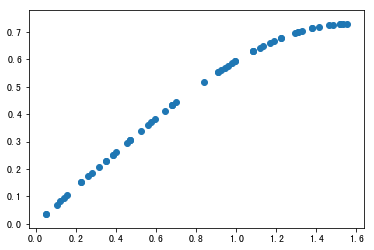

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
path = "/Users/qiwsir/Documents/Codes/DataSet"
df = pd.read_csv(path + "/Snell_law/experiment.csv", index_col=0)

fig, ax = plt.subplots()
ax.scatter(df['alpha'], df['belta'])

In [2]:
import seaborn as sns
sns.set(style="whitegrid")

tips = sns.load_dataset("tips")    #加载数据集
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
152,17.26,2.74,Male,No,Sun,Dinner,3
33,20.69,2.45,Female,No,Sat,Dinner,4
83,32.68,5.00,Male,Yes,Thur,Lunch,2
91,22.49,3.50,Male,No,Fri,Dinner,2
165,24.52,3.48,Male,No,Sun,Dinner,3


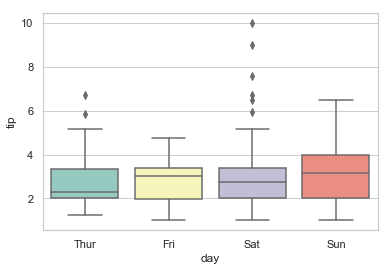

In [3]:
sns.boxplot(x="day", y="tip", data=tips, palette="Set3")

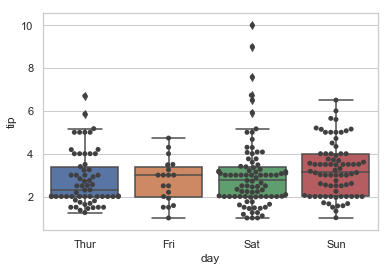

In [4]:
ax = sns.boxplot(x="day", y="tip", data=tips)
ax = sns.swarmplot(x="day", y="tip", data=tips, color=".25")   

**项目案例**

In [5]:
# 加载数据集
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

#为了操作方便，将数据集转化为DataFrame类型
boston_df = pd.DataFrame(boston.data)    
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
percentlier = boston_df.quantile([0, 0.25, 0.5, 0.75, 1], axis=0)    # ①
IQR = percentlier.iloc[3] - percentlier.iloc[1]
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64

In [8]:
Q1 = percentlier.iloc[1]    #下四分位
Q3 = percentlier.iloc[3]    #上四分位
(boston_df < (Q1 - 1.5 * IQR)).any()    # ②

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO     True
B           True
LSTAT      False
dtype: bool

In [9]:
(boston_df > (Q3 + 1.5 * IQR)).any()

CRIM        True
ZN          True
INDUS      False
CHAS        True
NOX        False
RM          True
AGE        False
DIS         True
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
dtype: bool

In [10]:
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(274, 13)

In [11]:
# 计算z值
from scipy import stats    #统计专用模块
import numpy as np
rm = boston_df['RM']
z = np.abs(stats.zscore(rm))    # ③
st = boston_df['RM'].std()    # ④
st

0.7026171434153237

In [12]:
threshold = 3 * st   #阈值，不是“阀值”
print(np.where(z > threshold))    # ⑤

(array([ 97,  98, 162, 163, 166, 180, 186, 195, 203, 204, 224, 225, 226,
       232, 233, 253, 257, 262, 267, 280, 283, 364, 365, 367, 374, 384,
       386, 406, 412, 414]),)


In [13]:
rm_in = rm[(z < threshold)]    # ⑥
rm_in.shape

(476,)

**动手练习**

In [14]:
# 第1题
import seaborn as sns
tips = sns.load_dataset("tips")    #加载数据集
percentlier = tips.quantile([0, 0.25, 0.5, 0.75, 1], axis=0)
Q1 = percentlier.iloc[1]
Q3 = percentlier.iloc[3]
IQR = Q3 - Q1

In [24]:
(tips['tip'] > (Q3 + 1.5*IQR)['tip']).any()    # 在此方向有离群值

True

In [25]:
(tips['tip'] < (Q1 - 1.5*IQR)['tip']).any()   # 在此方向上没有离群值

False

In [56]:
# 第2题
import pandas as pd
path = "/Users/qiwsir/Documents/Codes/DataSet"
bicycles = pd.read_csv(path + "/bicycle/Bicycle_Counts.csv")
bicycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53280 entries, 0 to 53279
Data columns (total 3 columns):
Date                            53280 non-null object
Fremont Bridge East Sidewalk    53271 non-null float64
Fremont Bridge West Sidewalk    53271 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [57]:
b = bicycles.isna()
b[b['Fremont Bridge West Sidewalk']==True]

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
6105,False,True,True
6106,False,True,True
12530,False,True,True
21266,False,True,True
22331,False,True,True
22332,False,True,True
30170,False,True,True
38906,False,True,True
47642,False,True,True


In [58]:
bicycles.iloc[6105]

Date                            06/14/2013 09:00:00 AM
Fremont Bridge East Sidewalk                       NaN
Fremont Bridge West Sidewalk                       NaN
Name: 6105, dtype: object

In [59]:
# 填补缺失值
bicycles['Fremont Bridge West Sidewalk'].fillna(bicycles['Fremont Bridge West Sidewalk'].mean(), inplace=True)
bicycles['Fremont Bridge East Sidewalk'].fillna(bicycles['Fremont Bridge East Sidewalk'].mean(), inplace=True)

In [60]:
bicycles.iloc[6105]

Date                            06/14/2013 09:00:00 AM
Fremont Bridge East Sidewalk                   57.4344
Fremont Bridge West Sidewalk                   54.3685
Name: 6105, dtype: object

In [65]:
df = bicycles[['Fremont Bridge West Sidewalk', 'Fremont Bridge East Sidewalk']]
df.columns = ['west', 'east']
df.describe()

,west,east
count,53280.000000,53280.000000
mean,54.368549,57.434401
std,71.276722,82.789004
min,0.000000,0.000000
25%,7.000000,7.000000
50%,30.000000,29.000000
75%,72.000000,70.000000
max,698.000000,717.000000


In [66]:
# 用正态分布规律检查离群值
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
st = df.std()

In [67]:
z

array([[0.70666861, 0.58503972],
       [0.70666861, 0.62127676],
       [0.74875848, 0.68167182],
       ...,
       [0.49621925, 0.51256565],
       [0.55233907, 0.54880269],
       [0.6084589 , 0.58503972]])

In [68]:
st

west    71.276722
east    82.789004
dtype: float64

In [74]:
threshold = 3 * st
print(np.where(z > threshold.values))

(array([], dtype=int64), array([], dtype=int64))


从上述返回值可知，利用正太分布规律没有检查到离群值。

In [80]:
p = df.quantile([0, 0.25, 0.5, 0.75, 1], axis=0)
Q1 = p.iloc[1]
Q3 = p.iloc[3]
IQR = Q3 - Q1
(df > (Q3 + 1.5*IQR)).any()

west    True
east    True
dtype: bool

用定量化的箱线图方法检测，说明有离群值。